### Libraries & settings

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Settings
np.random.seed(1997)
column_number = '44'

### Functions

In [2]:
# use A.dot(b) when b may be a scalar
# how to deal with scalars??? inversion, transpose, multiplication

def multiv_norm_mean(y, X, b, B):
    mean = (X.T@X + B.I).I @ (X.T@y + (B.I).dot(b))
    return(mean)

def multiv_norm_variance(X, B, Sigma_squared):
    Var = Sigma_squared * (X.T@X + B.I).I
    return(Var)

### Open data

In [3]:
data_path = '/Users/maxim_anisimov/Desktop/GitHub/data/'

returns = pd.read_excel(data_path + 'returns.xls')
Jan = pd.read_excel(data_path + 'Jan.xls')
rf = pd.read_excel(data_path + 'rf.xls')
rm = pd.read_excel(data_path +'rm.xls')

df = pd.DataFrame({'const': np.ones(len(rm)),
                   '3M yield change': rf[rf.columns[2]],
                   'S&P 500 log return': rm[rm.columns[2]],
                   'Jan': Jan['Jan']})

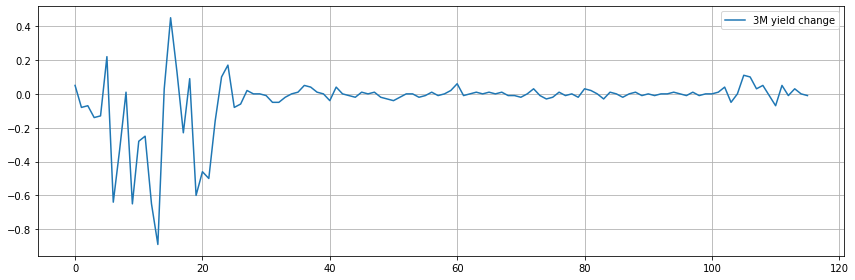

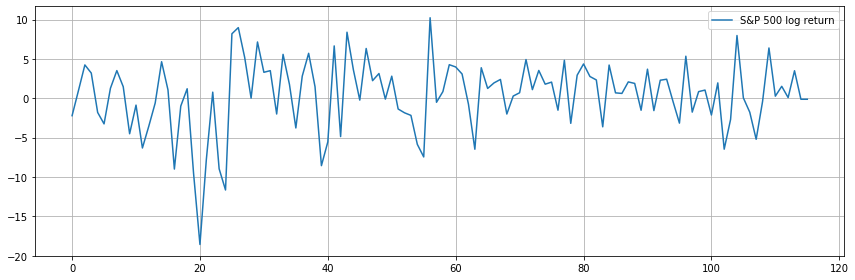

In [4]:
for col in ['3M yield change', 'S&P 500 log return']:
    
    df[[col]].plot(figsize=(12,4))
    plt.grid()
    plt.tight_layout()
    plt.show();

### Data Preprocessing

Model: $$r_t =β_0 +β_1 r^f_t +β_2 r^m_t +β_3 \text{Jan}_t +ε_t$$

Prior:
$$
\beta|\sigma^2 \sim N(0, \sigma^2 I_4),\\    
p(\sigma^2) ∝ \sigma^{−2}
$$

In [21]:
data = df[['3M yield change', 'S&P 500 log return', 'Jan']]
data['return_lag1'] = np.ravel(y)
data['return'] = data['return_lag1'].shift(-1)
data.tail()

,3M yield change,S&P 500 log return,Jan,return_lag1,return
111,0.05,1.520837,0,-0.155063,-2.705418
112,-0.01,0.091051,0,-2.705418,6.511632
113,0.03,3.499043,0,6.511632,14.104715
114,0.00,-0.121999,0,14.104715,-0.938484
115,-0.01,-0.123521,0,-0.938484,NaN


In [22]:
data = data[:len(data)-1]
data.tail()

,3M yield change,S&P 500 log return,Jan,return_lag1,return
110,-0.07,0.269576,0,0.465912,-0.155063
111,0.05,1.520837,0,-0.155063,-2.705418
112,-0.01,0.091051,0,-2.705418,6.511632
113,0.03,3.499043,0,6.511632,14.104715
114,0.00,-0.121999,0,14.104715,-0.938484


In [23]:
data.to_excel('return_data.xlsx')

In [5]:
# Gibbs sampler parameters
n_sim = 10**5 # number of simulations (size of sample of final posterior sample)
n_burn = 10**3 # burn-in size
k = 10 # thin value

b = np.matrix([[0],[0],[0],[0]]) # mean beta prior
B = np.asmatrix(np.diag([1,1,1,1])) # prior proportional matrix
beta_initial = np.matrix([[0],[0],[0],[0]]) # initial beta values for the draws in the first simulation

y = np.asmatrix(returns[returns.columns[int(column_number)+1]]).T
X = np.asmatrix(df)

Time = y.shape[0]
N = X.shape[1]

In [11]:
np.ravel(y)

array([ -8.32106176,   3.54818369,  -4.19141061,   5.42143841,
        -4.45814294,  -5.92408332,  -0.65767331,   6.58175663,
         0.48879069,   9.22797867,   1.76283546,  -8.27211887,
       -11.32544153,   0.43804105,   3.01370944,   2.79538395,
       -14.2783651 ,  -0.47684869,  11.89284312, -20.36782165,
       -27.42639201, -37.81050785,  39.06343278,  -2.96050502,
        -1.73724569,  37.36442415,  -4.64833581,   1.14928433,
       -10.144108  ,  12.22176327,  -6.25623387,   2.51723277,
         4.95490018,  11.27132074,  -9.8162855 ,  -7.08772031,
         0.10875477,  14.56519347,   7.98800664, -12.4310474 ,
       -17.68356496,   4.91808655,  -9.29135006,  22.15501208,
         3.40078594,   0.6382246 , -20.80019332,  -0.20328161,
        -5.80480023, -12.520422  ,   9.35946411,  -1.53799892,
         3.27169088, -17.13816168,  -8.391394  , -11.39581694,
        15.89184229,   4.30255041, -14.69729551,   3.40726966,
         2.12773984,  -4.38630511,  -5.16495783, -20.43

Then the number of ALL simulations is $n_{sim}*k + n_{burn}$

### Simulations

Draw #1
Draw #100100
Draw #200200
Draw #300300
Draw #400400
Draw #500500
Draw #600600
Draw #700700
Draw #800800
Draw #900900
Draw #1001000


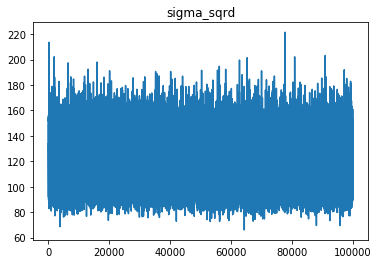

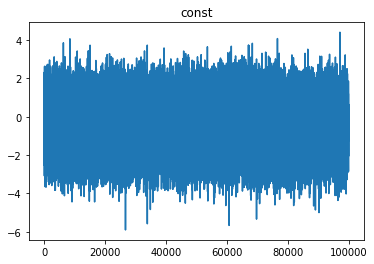

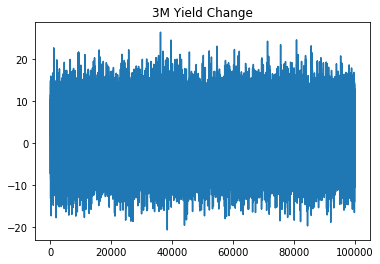

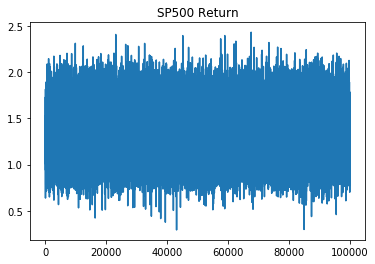

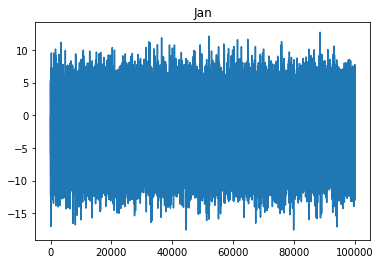

Posterior means: [117.10889371  -0.47434644   1.63781883   1.38890951  -2.49085548]
Posterior variance: [[2.33194087e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.16113586e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.77624926e+01 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.29692955e-02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.29960684e+01]]
Posterior Odd of the 3M Yield Change: 1.6482349514048886


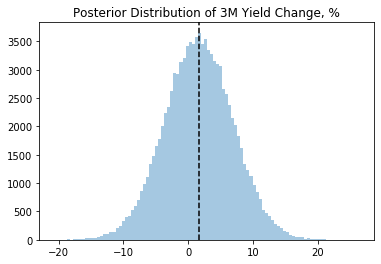

In [6]:
# matrix to save draws
draw_matrix = np.empty((n_burn+n_sim*k, 5))
draw_matrix[:] = np.nan 
colnames_draw_matrix = ['sigma_sqrd', 'const', '3M Yield Change', 'SP500 Return', 'Jan']

# Prepare mean of the prior
beta_mean = multiv_norm_mean(y, X, b, B)

# create n_sim*k + n_burn draws
for n_draw in range(n_sim*k+n_burn):
    
    if (n_draw+1) % ( (n_sim*k+n_burn)//10 ) == 0:
        print("Draw #" + str(n_draw+1))
        
    if n_draw == 0:
        print("Draw #" + str(n_draw+1))
        #first draw -> use initial betas
        beta_prev = beta_initial
    else:
        # there were previous draws -> take them to simulate sigma^2
        beta_prev = np.asmatrix(draw_matrix[n_draw-1, 1:5]).T
  
    ### draw sigma_sqrd conditional on betas and y
    RSS_prev = (y - X@beta_prev).T @ (y - X@beta_prev)  # construct residual sum of squares
    mu_IG = ( RSS_prev + (b-beta_prev).T @ np.linalg.inv(B) @ (b-beta_prev) )[0,0]
    chisq_rv = np.random.chisquare(df=Time+k, size=1)[0] # random chi-squared rv with T+k degrees of freedom
    sigma_sqrd_draw = mu_IG/chisq_rv
  
    # draw betas conditional on sigma_squared_draw and beta
    beta_var = multiv_norm_variance(X=X, B=B, Sigma_squared=sigma_sqrd_draw)
    beta_draw = np.random.multivariate_normal(mean=beta_mean.T.tolist()[0], cov=beta_var, size=1)[0]
  
    current_draw = np.append(sigma_sqrd_draw, beta_draw)
    #print(current_draw)
  
    draw_matrix[n_draw] = current_draw

    
draw_matrix = draw_matrix[n_burn:(n_burn+n_sim*k)] # discard burn-in sample
# Is correlation of draws present?
#for (col_name in colnames(draw.matrix)){
#  acf(draw.matrix[,col_name], main=col_name)
#}
#"Significant first AC in sigma squared"

#%% Thinning
draw_matrix =  draw_matrix[::k]
# check whether thinning helps
#for (col_name in colnames(draw.matrix)){
#  acf(draw.matrix[,col_name], main=col_name)
#}
# Now, no significant spikes at all

#%% Traceplots
for col_num in range(draw_matrix.shape[1]):
    plt.plot(draw_matrix[:,col_num])
    plt.title(colnames_draw_matrix[col_num])
    plt.show();

#%% Posterior Results
post_mean = np.mean(draw_matrix, axis=0)
print('Posterior means:', post_mean)
# posterior population variance with correction
post_var = np.diag(np.var(draw_matrix, axis=0)) * (draw_matrix.shape[0]-1)/draw_matrix.shape[0]
print('Posterior variance:', post_var)

# Posterior Odd
print('Posterior Odd of the 3M Yield Change:',
      np.sum(draw_matrix[:, 2] > 0) / np.sum(draw_matrix[:, 2] < 0))

# Posterior Distribution of 3M Yield Change
sns.distplot(draw_matrix[:,2], kde=False, bins=100)
plt.axvline(post_mean[2], color='k', ls='--')
plt.title('Posterior Distribution of 3M Yield Change, %');